In [14]:
import os
import h5py
import numpy as np

In [2]:
# path_cxi = "inference_results/peaknet.mfxx49820_0107.v2.cxi"

In [3]:
fh = h5py.File(path_cxi, "r+")

In [11]:
events = fh.get('/entry_1/result_1/peakEvent')[:]

In [12]:
events

array([   13,    31,    41, ..., 40272, 40277, 40324])

In [9]:
n_peaks_all = fh.get('/entry_1/result_1/nPeaksAll')[:]

In [10]:
n_peaks_all

array([21, 61, 74, ..., -1, -1, -1])

In [17]:
n_peaks_new = np.ones_like(n_peaks_all) * -1

In [22]:
n_peaks_new[events] = n_peaks_all[:len(events)]

In [24]:
events

array([   13,    31,    41, ..., 40272, 40277, 40324])

In [25]:
n_peaks_new[13]

21

In [27]:
fh['/entry_1/result_1/nPeaksAll'][:] = n_peaks_new

In [29]:
fh['/entry_1/result_1/nPeaksAll'][13]

21

In [30]:
fh.close()

In [6]:
fh.get('/entry_1/result_1/peakXPosRawAll')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [1]:
import matplotlib.pyplot       as plt
import matplotlib.colors       as mcolors
import matplotlib.patches      as mpatches
import matplotlib.transforms   as mtransforms
import matplotlib.font_manager as font_manager
%matplotlib inline

In [2]:
import os
import h5py
import numpy as np

In [3]:
path_cxi = "inference_results/peaknet.cxic00318_0123.cxi"

In [4]:
fh = h5py.File(path_cxi, "r")

In [5]:
n_peaks_all = fh.get('/entry_1/result_1/nPeaksAll')[:]

In [6]:
n_peaks_all[48757]

603

In [7]:
x = fh.get('/entry_1/result_1/peakXPosRawAll')[48757]

In [8]:
x[602:]

array([201.,   0.,   0., ...,   0.,   0.,   0.], dtype=float32)

In [33]:
fh.get('entry_1/data_1/data').shape

(162679, 4096, 1024)

In [34]:
fh.get('entry_1/result_1/peakXPosRawAll').shape

(248024, 2048)

In [35]:
fh.get('entry_1/result_1/peakEvent').shape

(162679,)

In [43]:
events = fh.get('entry_1/result_1/peakEvent')[:]

In [48]:
np.argwhere(events == 160278)[0, 0]

110561

In [ ]:
fh.get

In [64]:
event = 48757
# event = 69028
# event = 51611
# event = 160278
event = 166407
event = 48757

events = fh.get('entry_1/result_1/peakEvent')[:]

idx = np.argwhere(events == event)[0, 0]

cheetah_img = fh.get('entry_1/data_1/data')[idx]

In [65]:
x_asmb = fh.get('entry_1/result_1/peakXPosRawAll')[event]
y_asmb = fh.get('entry_1/result_1/peakYPosRawAll')[event]
n_peaks = fh.get('entry_1/result_1/nPeaksAll')[event]


In [66]:
n_peaks, event

(603, 48757)

In [67]:
y_asmb.max(), x_asmb.max()

(4094.996, 1016.88696)

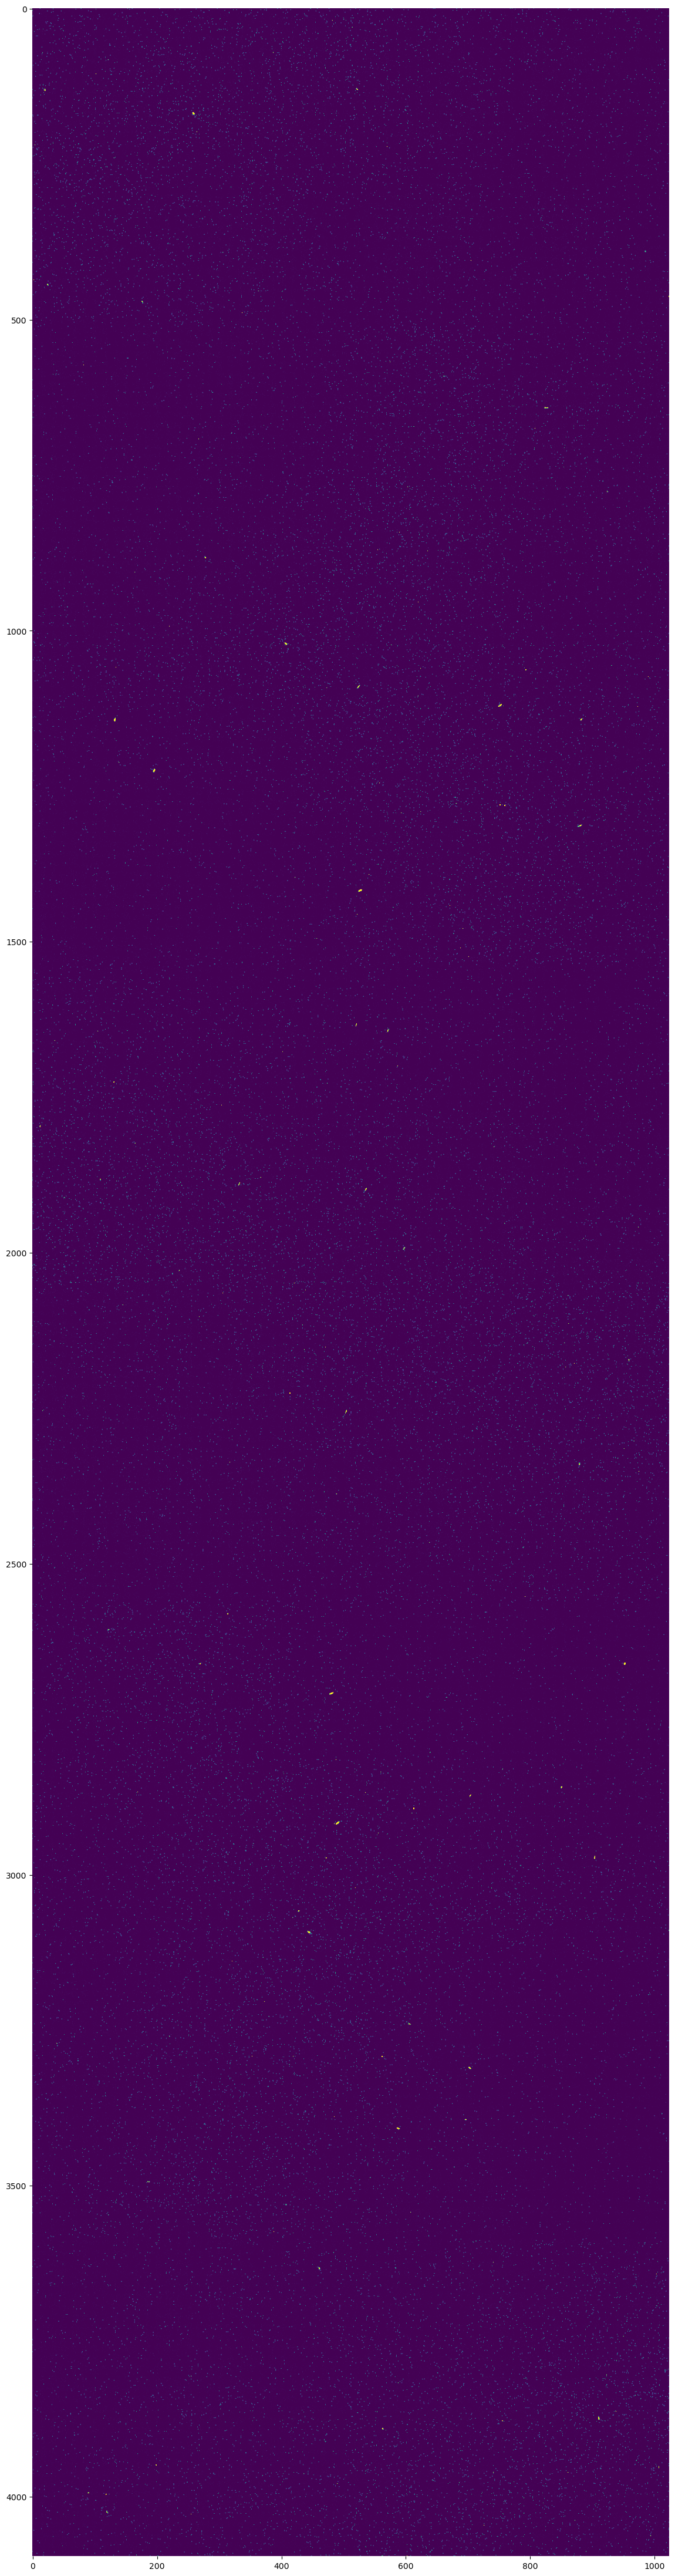

In [74]:
ncols = 1
nrows = 1
fig   = plt.figure(figsize = (14,14 * 5))
gspec = fig.add_gridspec( nrows, ncols,
                          #width_ratios  = [1/2, 1/2, 1/2, 1/2, 1/2, 1/2, 1/20],
                          #height_ratios = [1/2, 1/2],
                        )
ax_list = [ fig.add_subplot(gspec[i, j], aspect = 1) for i in range(nrows) for j in range(ncols)]    # Plain list
## ax_list = [ [fig.add_subplot(gspec[i, j], aspect = 1) for j in range(ncols) ] for i in range(nrows)  ]    # Nested lists

ax = ax_list[0]
vmin = cheetah_img.mean()
vmax = cheetah_img.mean() + 0.2 * cheetah_img.std()
ax.imshow(cheetah_img, vmin = vmin, vmax = vmax)


# Apply style...
for ax in ax_list:
    # ax.set_xticks([])
    # ax.set_yticks([])

    # Hide the frame box
    ax.spines['top'   ].set_visible(False)
    ax.spines['right' ].set_visible(False)
    ax.spines['left'  ].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # # Overlay panel label...
    # for enum_idx, (k, (x_min, y_min, x_max, y_max)) in enumerate(cheetah_geom_dict.items()):
    #     x_mean, y_mean = np.mean([x_min, x_max]), np.mean([y_min, y_max])
    #     ax.scatter(x_mean, y_mean, c = 'black', s=1, alpha = 0)
    #     rec_obj = mpatches.Rectangle((x_min, y_min),
    #                                  x_max - x_min, y_max - y_min, 
    #                                  linewidth = 1.0, 
    #                                  edgecolor = 'red', 
    #                                  facecolor='none')
    #     ax.add_patch(rec_obj)
    #     ax.text(x_mean, y_mean, k, fontsize=12, c = 'white', ha='center', va='center')
    
    # # Place a box on a peak
    # offset = 3
    # b_offset = 2
    # for i in range(n_peaks):
    #     y = y_asmb[i]
    #     x = x_asmb[i]
    #     x_bottom_left = x - offset
    #     y_bottom_left = y - offset

    #     rec_obj = mpatches.Rectangle((x_bottom_left, y_bottom_left),
    #                                 2 * offset, 2 * offset, 
    #                                 linewidth = 1.0, 
    #                                 edgecolor = 'yellow', 
    #                                 facecolor='none')
    #     ax.add_patch(rec_obj)

    # y_bmin, x_bmin = 0, 0
    # y_bmax, x_bmax = size_y, size_x
    # ax.set_xlim([x_bmin - b_offset, x_bmax + b_offset])
    # ax.set_ylim([y_bmin - b_offset, y_bmax + b_offset])
    # ax.invert_yaxis()

In [71]:
cheetah_img.mean(), cheetah_img.max(), cheetah_img.std()

(0.1678124, 107197.67, 88.33768)